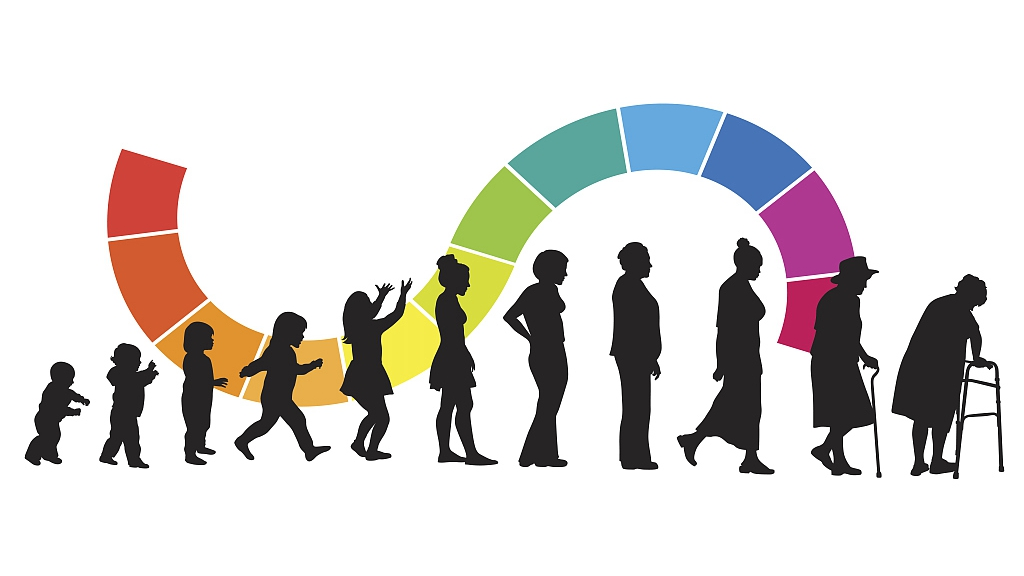

# Introduction :

Dans la quête du bien-être sociétal et du progrès, tous les gouvernements partagent une aspiration commune : l'augmentation du taux d'espérance de vie. La mesure du succès d'une nation est de plus en plus liée à la santé et à la longévité de ses citoyens. Pour dévoiler les facteurs complexes qui façonnent les taux d'espérance de vie, nous plongeons dans le domaine de l'analyse de données, en nous concentrant particulièrement sur un ensemble de données exhaustif portant sur l'espérance de vie.

## A propos: Life Expectancy Dataset

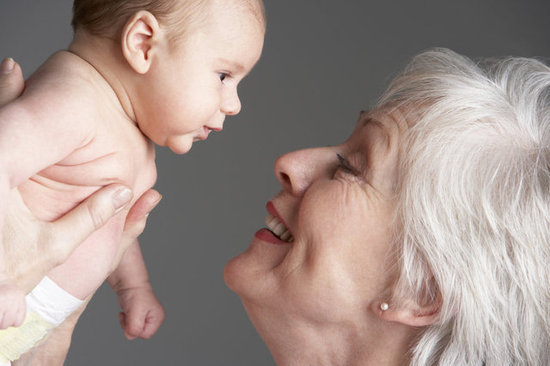
    
    Ce jeu de données spécifie l'espérance de vie en fonction d'une liste d'attributs. Les caractéristiques incluses dans le dataset sont les suivantes :
- Pays (Country),
- Taux d'alphabétisation (literacyrate),
- Homicides pour 100 000 habitants (homicidiesper100k),
- Accès à l'électricité (electricity),
- Niveau de scolarité (Schooling),
- VIH/SIDA (HIV.AIDS),
- Statut (Status),
- Accès à l'eau potable (wateraccess),
- Tuberculose (tuberculosis),
- Taux d'inflation (inflation),
- Dépenses de santé par habitant (healthexppercapita),
- Taux de fécondité (fertilityrate),
- Espérance de vie (lifeexp),
- Accès à Internet (internet),
- PIB par habitant (gdppercapita),
- Émissions de CO2 (CO2),
- Couverture forestière (forest),
- Population urbaine (urbanpop),
- Croissance de la population urbaine (urbanpopgrowth),
- Pays les moins développés (leastdeveloped).

**Objectif** : Déterminer la qualité de vie dans les pays en fonction de divers indicateurs de santé et de développement en utilisant des techniques de la classification








##Importation des Bibliothèques :

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

##Chargement des Données :

In [3]:
df = pd.read_csv('lifeexpectancy1.csv')
df2 = pd.read_csv('lifeexpectancy2.csv')

##Prétraitement des données :

Fusion des deux jeux de donnée, sélection des colonnes pertinentes et traitement des valeurs manquantes.

In [4]:
combined_df = pd.concat([df, df2])
combined_df = combined_df.drop_duplicates(subset='Country')

combined_df = combined_df.reset_index(drop=True)
lfe_data = combined_df[["Country","Status","wateraccess","inflation","tuberculosis", "lifeexp","literacyrate","electricity","Schooling"]]

# Création d'un imputeur qui remplace chaque valeur manquante par la moyenne de cette colonne
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Séparation des caractéristiques numériques et catégorielle
num_cols = lfe_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = lfe_data.select_dtypes(include=['object']).columns

# Application de l'imputeur aux colonnes numériques
lfe_data[num_cols] = imputer.fit_transform(lfe_data[num_cols])
pd.set_option('display.max_rows', None)

print(lfe_data)

                      Country          Status  wateraccess  inflation  \
0                     Albania      Developing         95.1   1.613042   
1                     Algeria      Developing         84.0   2.916927   
2                     Armenia      Developing        100.0   2.981309   
3                  Azerbaijan      Developing         86.2   1.389726   
4                     Bahrain      Developing        100.0   2.646291   
5                  Bangladesh  Leastdeveloped         86.2   6.991639   
6                     Belarus      Developing         99.7  18.119554   
7      Bosnia and Herzegovina      Developing         99.9  -0.897194   
8                      Brazil      Developing         98.1   6.329152   
9                    Bulgaria       Developed         99.4  -1.418184   
10                      Chile      Developing         99.0   4.718675   
11                      China      Developing         94.8   1.921643   
12                   Colombia      Developing      

<ipython-input-4-c6adf7726ff6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lfe_data[num_cols] = imputer.fit_transform(lfe_data[num_cols])


L'objectif est d'éliminer les données superflues, corriger les erreurs éventuelles et sélectionner les variables clés nécessaires à notre analyse approfondie. Cette étape nous permettra de disposer d'un jeu de données fiable et optimisé pour identifier les facteurs influant sur la durée de vie.

#Exploration des Données :

###**Analyse des données :**


*   Pour comprendre la distribution des caractèristiques
*   Prendre connaissance des valeurs manquantes (si **présente**)



In [5]:
lfe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       138 non-null    object 
 1   Status        138 non-null    object 
 2   wateraccess   138 non-null    float64
 3   inflation     138 non-null    float64
 4   tuberculosis  138 non-null    float64
 5   lifeexp       138 non-null    float64
 6   literacyrate  138 non-null    float64
 7   electricity   138 non-null    float64
 8   Schooling     138 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


- Résumé statistique des principales caractéristiques numériques du DataFrame

In [6]:
lfe_data.describe()

,wateraccess,inflation,tuberculosis,lifeexp,literacyrate,electricity,Schooling
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,88.554348,3.816283,121.607681,71.615724,90.855738,3180.130238,13.044203
std,14.732248,5.065714,162.039059,8.202395,7.679331,2071.932719,2.939835
min,40.000000,-1.509245,0.760000,50.621000,55.375190,139.143681,5.300000
25%,81.725000,0.860427,14.000000,66.151250,90.855738,2743.672186,10.825000
50%,95.350000,2.704123,53.000000,73.752500,90.855738,3180.130238,13.100000
75%,99.675000,5.208063,166.500000,77.151037,93.724381,3180.130238,15.200000
max,100.000000,36.906643,852.000000,83.587805,99.895903,19592.231949,20.400000


###**Visualisation de donnée:**

Cette historigramme nous permet de visualiser la tranche d'esperance de vie et sa fréquence dans notre data set, la frequence indiquant combien de pays ont une espérance de vie dans chaque intervalle spécifié



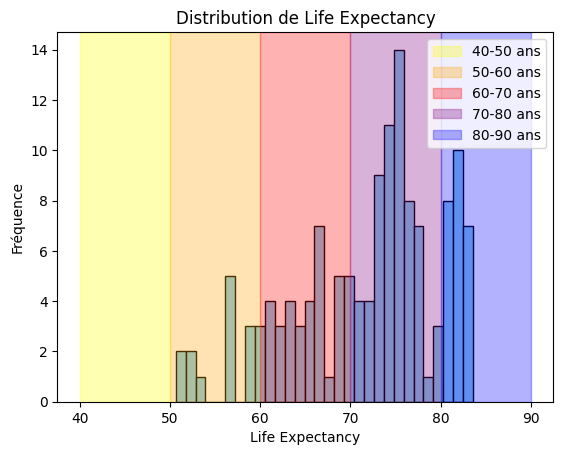

In [7]:
lfe_data = lfe_data.dropna()

plt.hist(lfe_data['lifeexp'], bins=30, edgecolor='black', color='skyblue')

plt.axvspan(40, 50, color='yellow', alpha=0.3, label='40-50 ans')
plt.axvspan(50, 60, color='orange', alpha=0.3, label='50-60 ans')
plt.axvspan(60, 70, color='red', alpha=0.3, label='60-70 ans')
plt.axvspan(70, 80, color='purple', alpha=0.3, label='70-80 ans')
plt.axvspan(80, 90, color='blue', alpha=0.3, label='80-90 ans')


plt.title('Distribution de Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

Cette historigramme nous permet de visualiser la tranche d'esperance de vie et sa fréquence dans notre data set, la frequence indiquant combien de pays ont une espérance de vie dans chaque intervalle spécifié

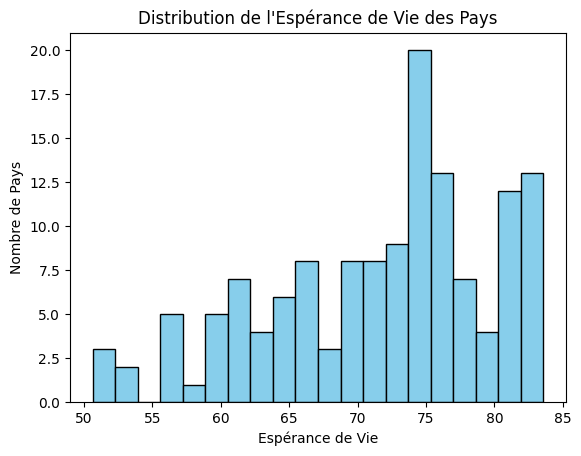

In [8]:
plt.hist(lfe_data['lifeexp'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution de l\'Espérance de Vie des Pays')
plt.xlabel('Espérance de Vie')
plt.ylabel('Nombre de Pays')
plt.show()

Cette matrice de corrélation montre à quel point les variables d'un ensemble de données sont liées entre elles. Dans ce notebook, elle est utilisée pour comprendre comment différentes caractéristiques (comme l'accès à l'électricité) sont corrélées à l'espérance de vie, aidant ainsi à identifier des facteurs influençant la qualité de vie dans les pays.


<ipython-input-9-29d102897454>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = lfe_data.corr()


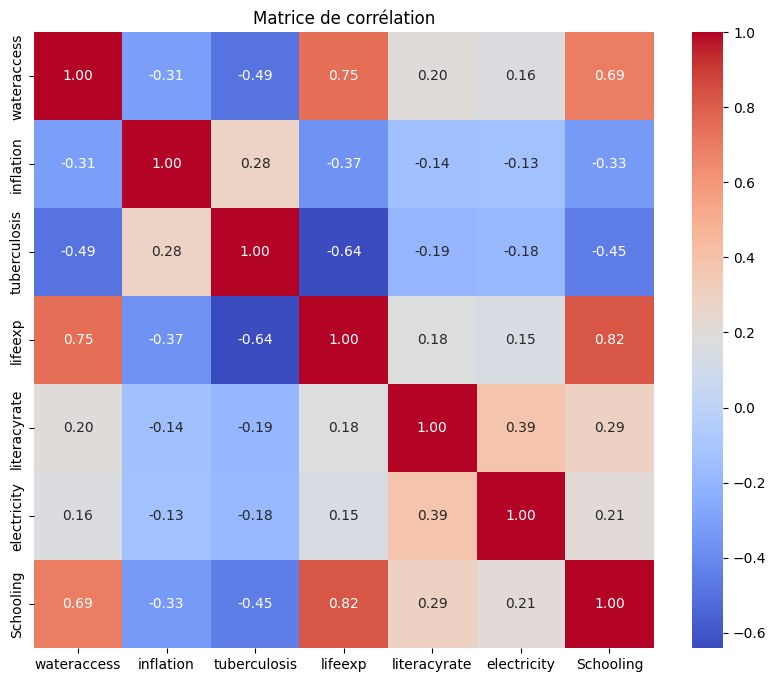

In [9]:
correlation_matrix = lfe_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

Les pays avec l'espérance de vie la plus élevée et la plus basse

Pays avec l'espérance de vie la plus élévée: Japan
Pays avec l'espérance de vie la plus basse: Central African Republic


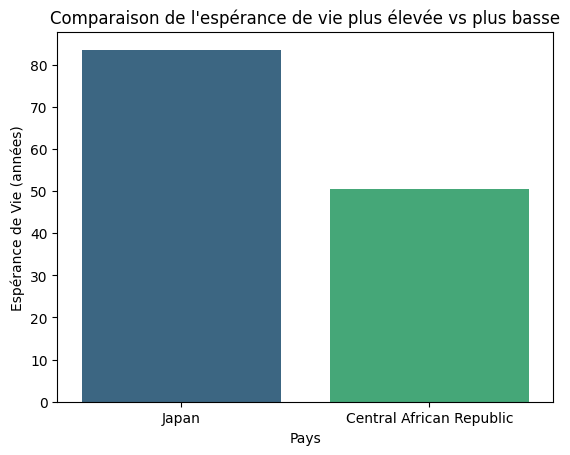

In [10]:
df = lfe_data.sort_values(by='lifeexp', ascending=False)

elevee_df = df.iloc[0]  #plus élevée
basse_df = df.iloc[-1]  # plus basse

print("Pays avec l'espérance de vie la plus élévée:", elevee_df['Country'])
print("Pays avec l'espérance de vie la plus basse:", basse_df['Country'])

result = pd.DataFrame({'Country': [elevee_df['Country'], basse_df['Country']], 'Life Expectancy': [elevee_df['lifeexp'], basse_df['lifeexp']]})
sns.barplot(x='Country', y='Life Expectancy', data=result, palette ='viridis')
plt.title('Comparaison de l\'espérance de vie plus élevée vs plus basse')
plt.xlabel('Pays')
plt.ylabel('Espérance de Vie (années)')
plt.show()

Ce diagramme en cercle montre visuellement la répartition des différents statuts de pays dans votre dataset. Chaque secteur représente un statut (développé, en développement, sous-développé) et sa taille est proportionnelle au nombre de pays ayant ce statut

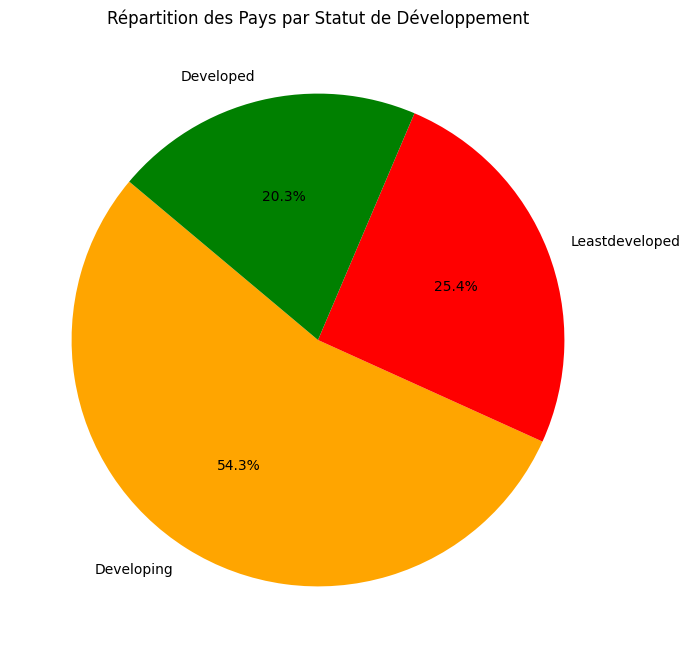

In [11]:
status_counts = lfe_data['Status'].value_counts()

colors = ['orange', 'red', 'green']
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Répartition des Pays par Statut de Développement')
plt.show()

La corrélation entre le niveau de développement d'un pays (status) et son accès à l'eau potable

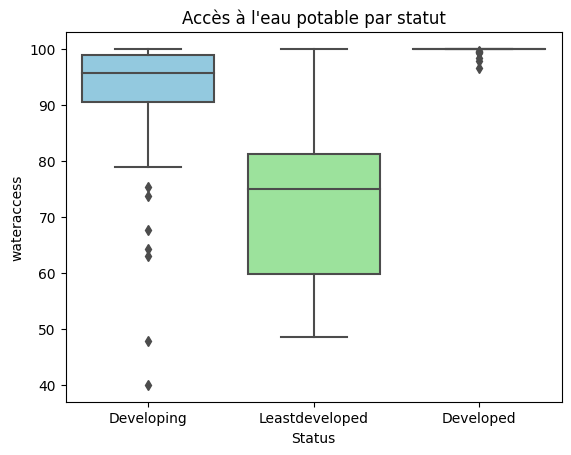

In [12]:
couleurs = ['skyblue', 'lightgreen', 'orange']

sns.boxplot(x='Status', y='wateraccess', data=lfe_data, palette= couleurs)
plt.title('Accès à l\'eau potable par statut')
plt.show()

Ce graphique en nuage de points montre la relation entre l'inflation et l'espérance de vie, chaque point représentant un pays

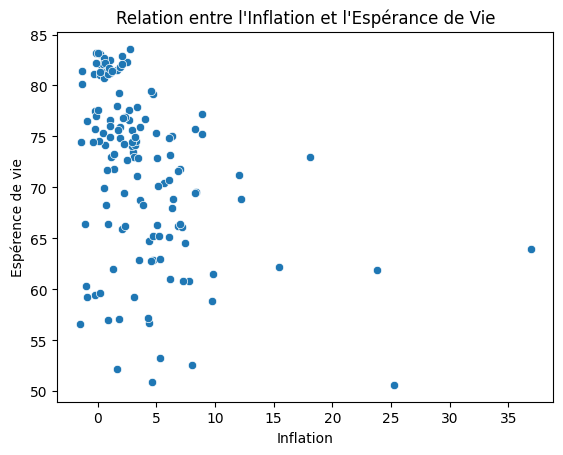

In [13]:
sns.scatterplot(x='inflation', y='lifeexp', data= lfe_data )
plt.title('Relation entre l\'Inflation et l\'Espérance de Vie')
plt.xlabel('Inflation')
plt.ylabel('Espérence de vie')
plt.show()

Diagramme de barres qui illustre le taux d'inflation pour différents pays

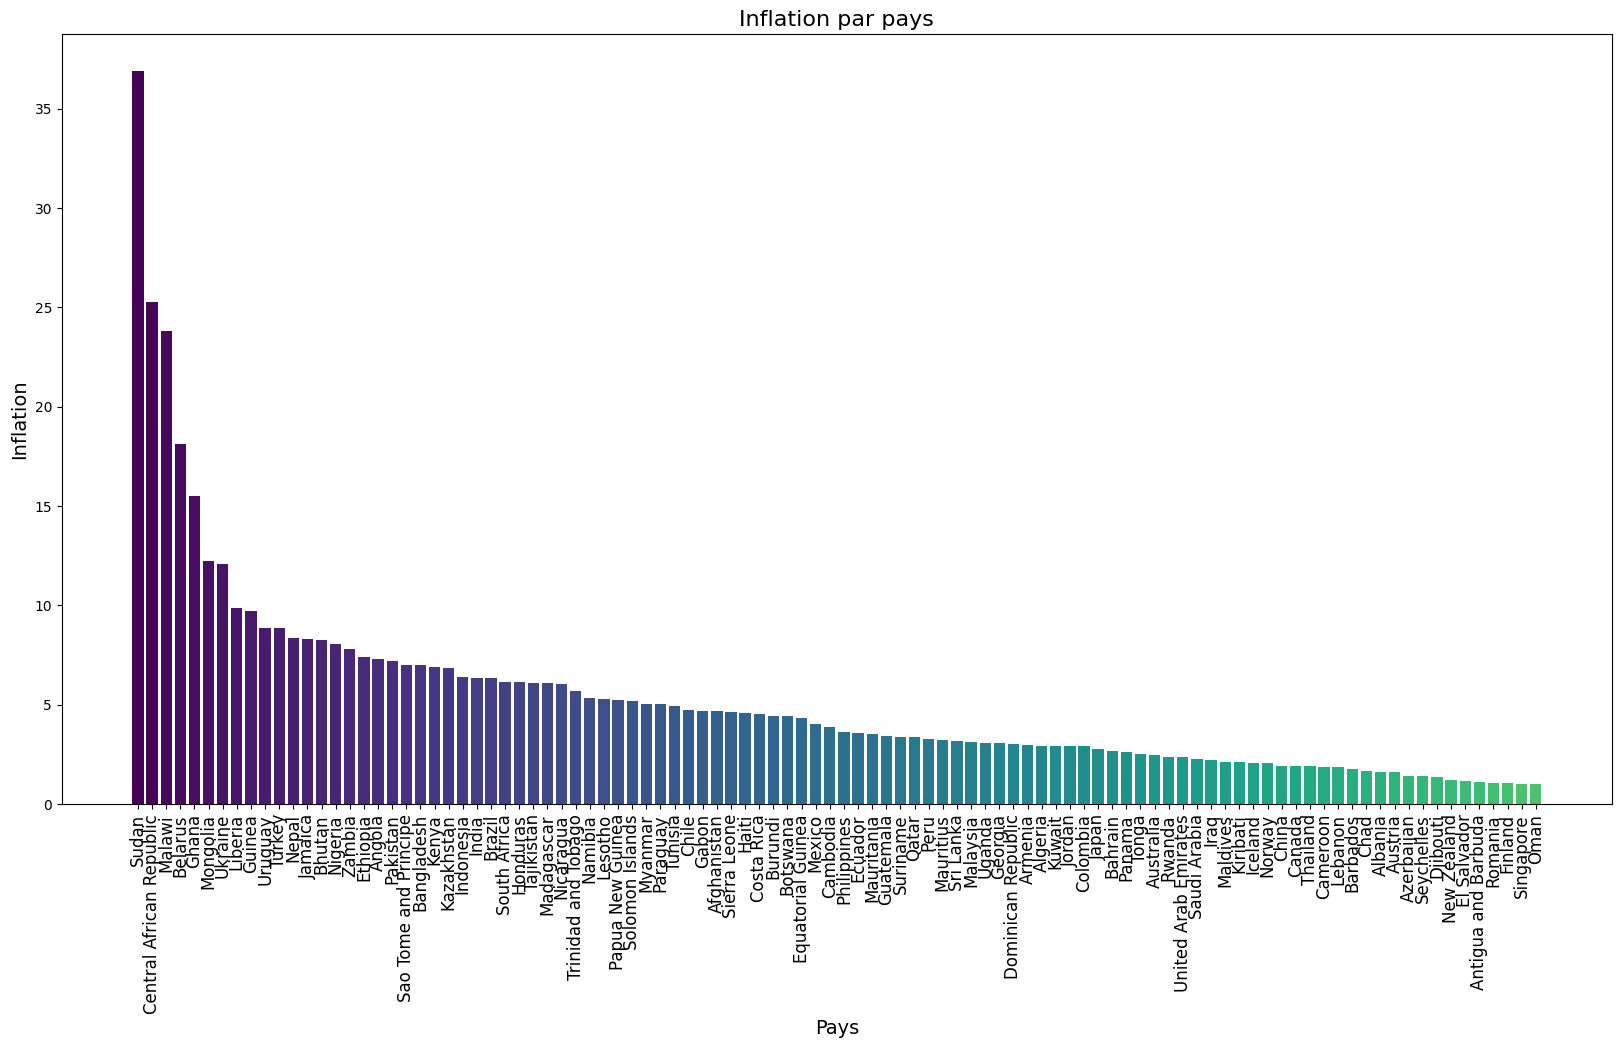

In [14]:
df = lfe_data.sort_values(by='inflation', ascending=False)

plt.figure(figsize=(20, 10))
bar_colors = sns.color_palette("viridis", len(df))
df_pays = df.head(100)

bars = plt.bar(df_pays['Country'], df_pays['inflation'], color=bar_colors)
plt.title('Inflation par pays', fontsize=16)
plt.xlabel('Pays', fontsize=14)
plt.ylabel('Inflation', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=12)

plt.show()

Ce diagramme conçu pour etudier le taux d'inflation dans le dataframe

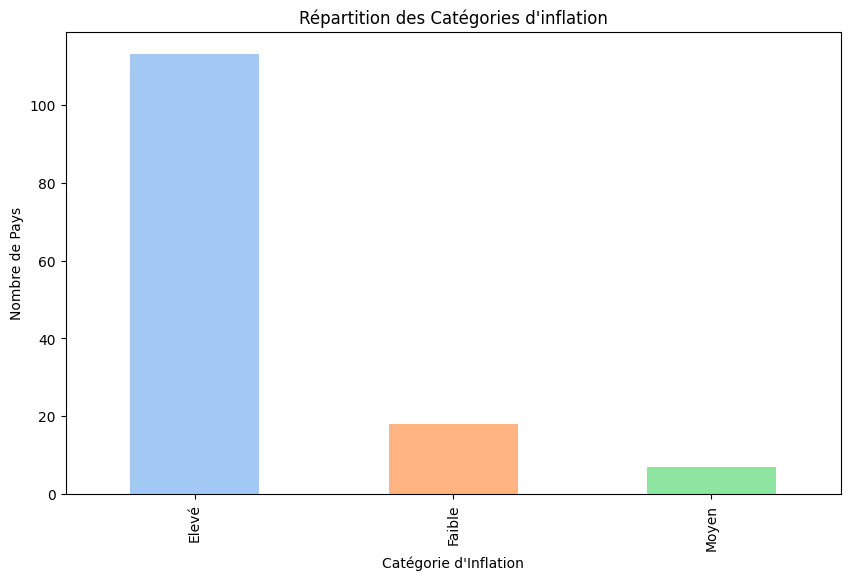

In [15]:
def categorize_inflation(inflation) :
  if inflation < 0.1 :
    return 'Faible'
  elif inflation >=0.1 and  inflation < 0.4 :
    return 'Moyen'
  else :
    return 'Elevé'
lfe_data["rate of quality"] = lfe_data['inflation'].apply(categorize_inflation)

rate_of_quality = lfe_data["rate of quality"].value_counts()
colors = sns.color_palette('pastel')[0:len(rate_of_quality)]

plt.figure(figsize=(10, 6))
rate_of_quality.plot(kind="bar", color=colors)
plt.title('Répartition des Catégories d\'inflation')
plt.xlabel('Catégorie d\'Inflation')
plt.ylabel('Nombre de Pays')

plt.show()

Prédiction de l'Inflation des Pays Basée sur des Indicateurs de Développement avec Régression Linéaire



In [16]:
X= lfe_data[['lifeexp', 'tuberculosis', 'literacyrate', 'wateraccess']]
y = lfe_data['inflation'] # variable cible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions)) # erreur quadratique moyenne

print("RMSE:", rmse)

RMSE: 5.763172736529843


 Prédire la variable "wateraccess" en utilisant des modèles de classification ( K-Nearest Neighbors (KNN) ou Support Vector Classifier (SVC) )

In [37]:
X = lfe_data.drop('wateraccess', axis=1)
y = lfe_data['wateraccess']

X = lfe_data.select_dtypes(include=[np.number])
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.5, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement et évaluation du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
print("KNN Model Evaluation:")
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

# Entraînement et évaluation du modèle SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
svc_predictions = svc_model.predict(X_test_scaled)



print("\nSVC Model Evaluation:")
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))

KNN Model Evaluation:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Ce box plot permet de voir la différence entre les atux de scolarisation et le status d'un pays

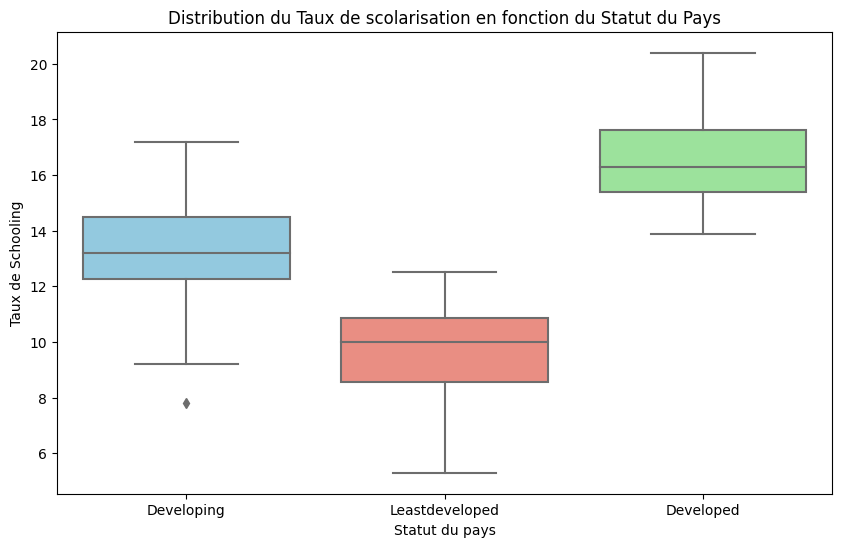

In [17]:
plt.figure(figsize=(10, 6))
colors  = ['skyblue', 'salmon', 'lightgreen']

sns.boxplot(x='Status', y='Schooling', data=lfe_data, palette= colors)
plt.title('Distribution du Taux de scolarisation en fonction du Statut du Pays')
plt.xlabel('Statut du pays')
plt.ylabel('Taux de Schooling')
plt.show()

Ce diagramme chercher a mettre en lumièren la correlation entre le taux
 d'electrisation et le status d'un pays


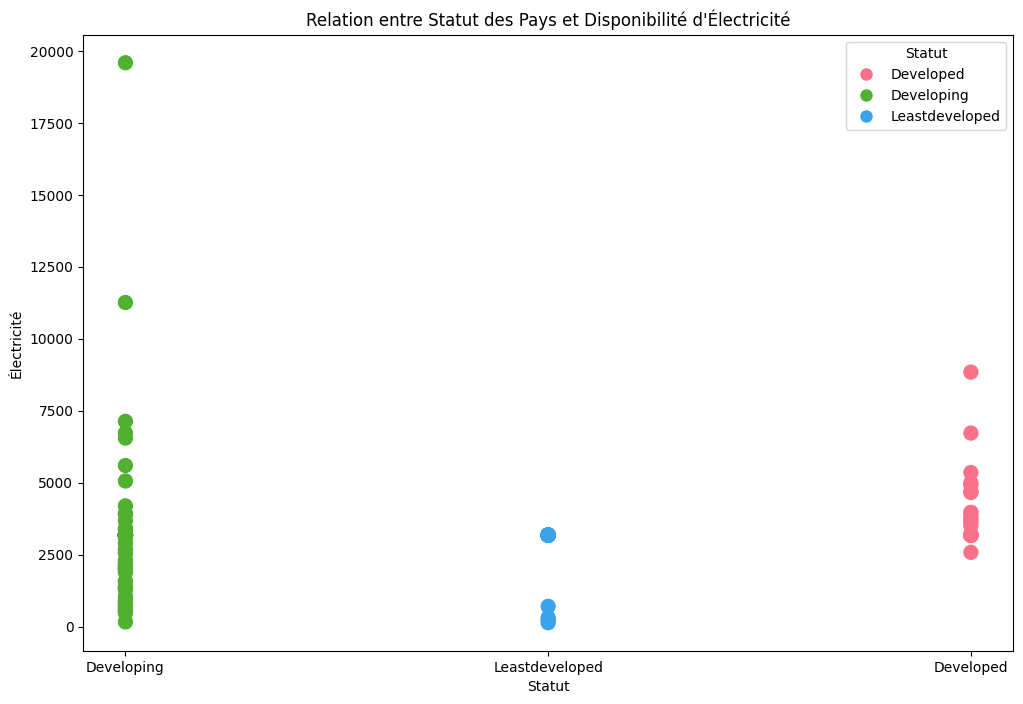

In [18]:
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", 3)
colors = {'Developed': palette[0], 'Developing': palette[1], 'Leastdeveloped': palette[2]}

lfe_data['color'] = lfe_data['Status'].map(lambda x: colors.get(x, 'gray'))

# Créer graphique de dispersion
plt.scatter(lfe_data['Status'], lfe_data['electricity'], c=lfe_data['color'], s=100)

plt.title('Relation entre Statut des Pays et Disponibilité d\'Électricité')
plt.xlabel('Statut')
plt.ylabel('Électricité')

# Ajouter une légende
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=status,markerfacecolor=color, markersize=10) for status, color in colors.items()]
plt.legend(handles=legend_labels, title='Statut')
plt.show()

Analyse de Régression Linéaire pour la Prédiction de l'Espérance de Vie


Erreur quadratique moyenne (MSE) : 13.538435218423952
Coefficient de détermination (R^2) : 0.8030876962775488


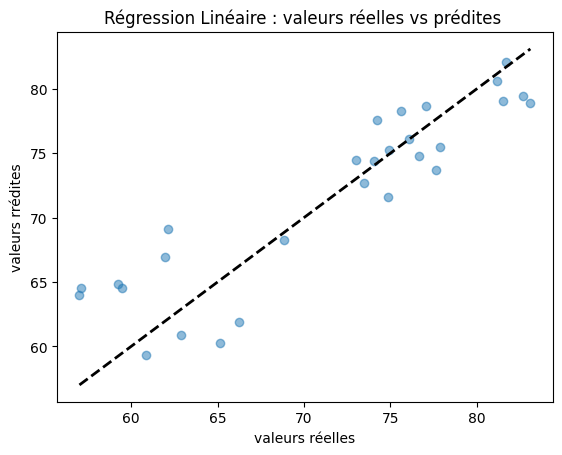

In [19]:
X = lfe_data[['wateraccess', 'tuberculosis', 'literacyrate', 'electricity', 'Schooling']]
y = lfe_data['lifeexp'] #variable cible

#division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)
# Calcul de l'erreur quadratique moyenne et du coefficient de détermination
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Coefficient de détermination (R^2) : {r2}")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Régression Linéaire : valeurs réelles vs prédites ")
plt.xlabel("valeurs réelles")
plt.ylabel("valeurs rrédites")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

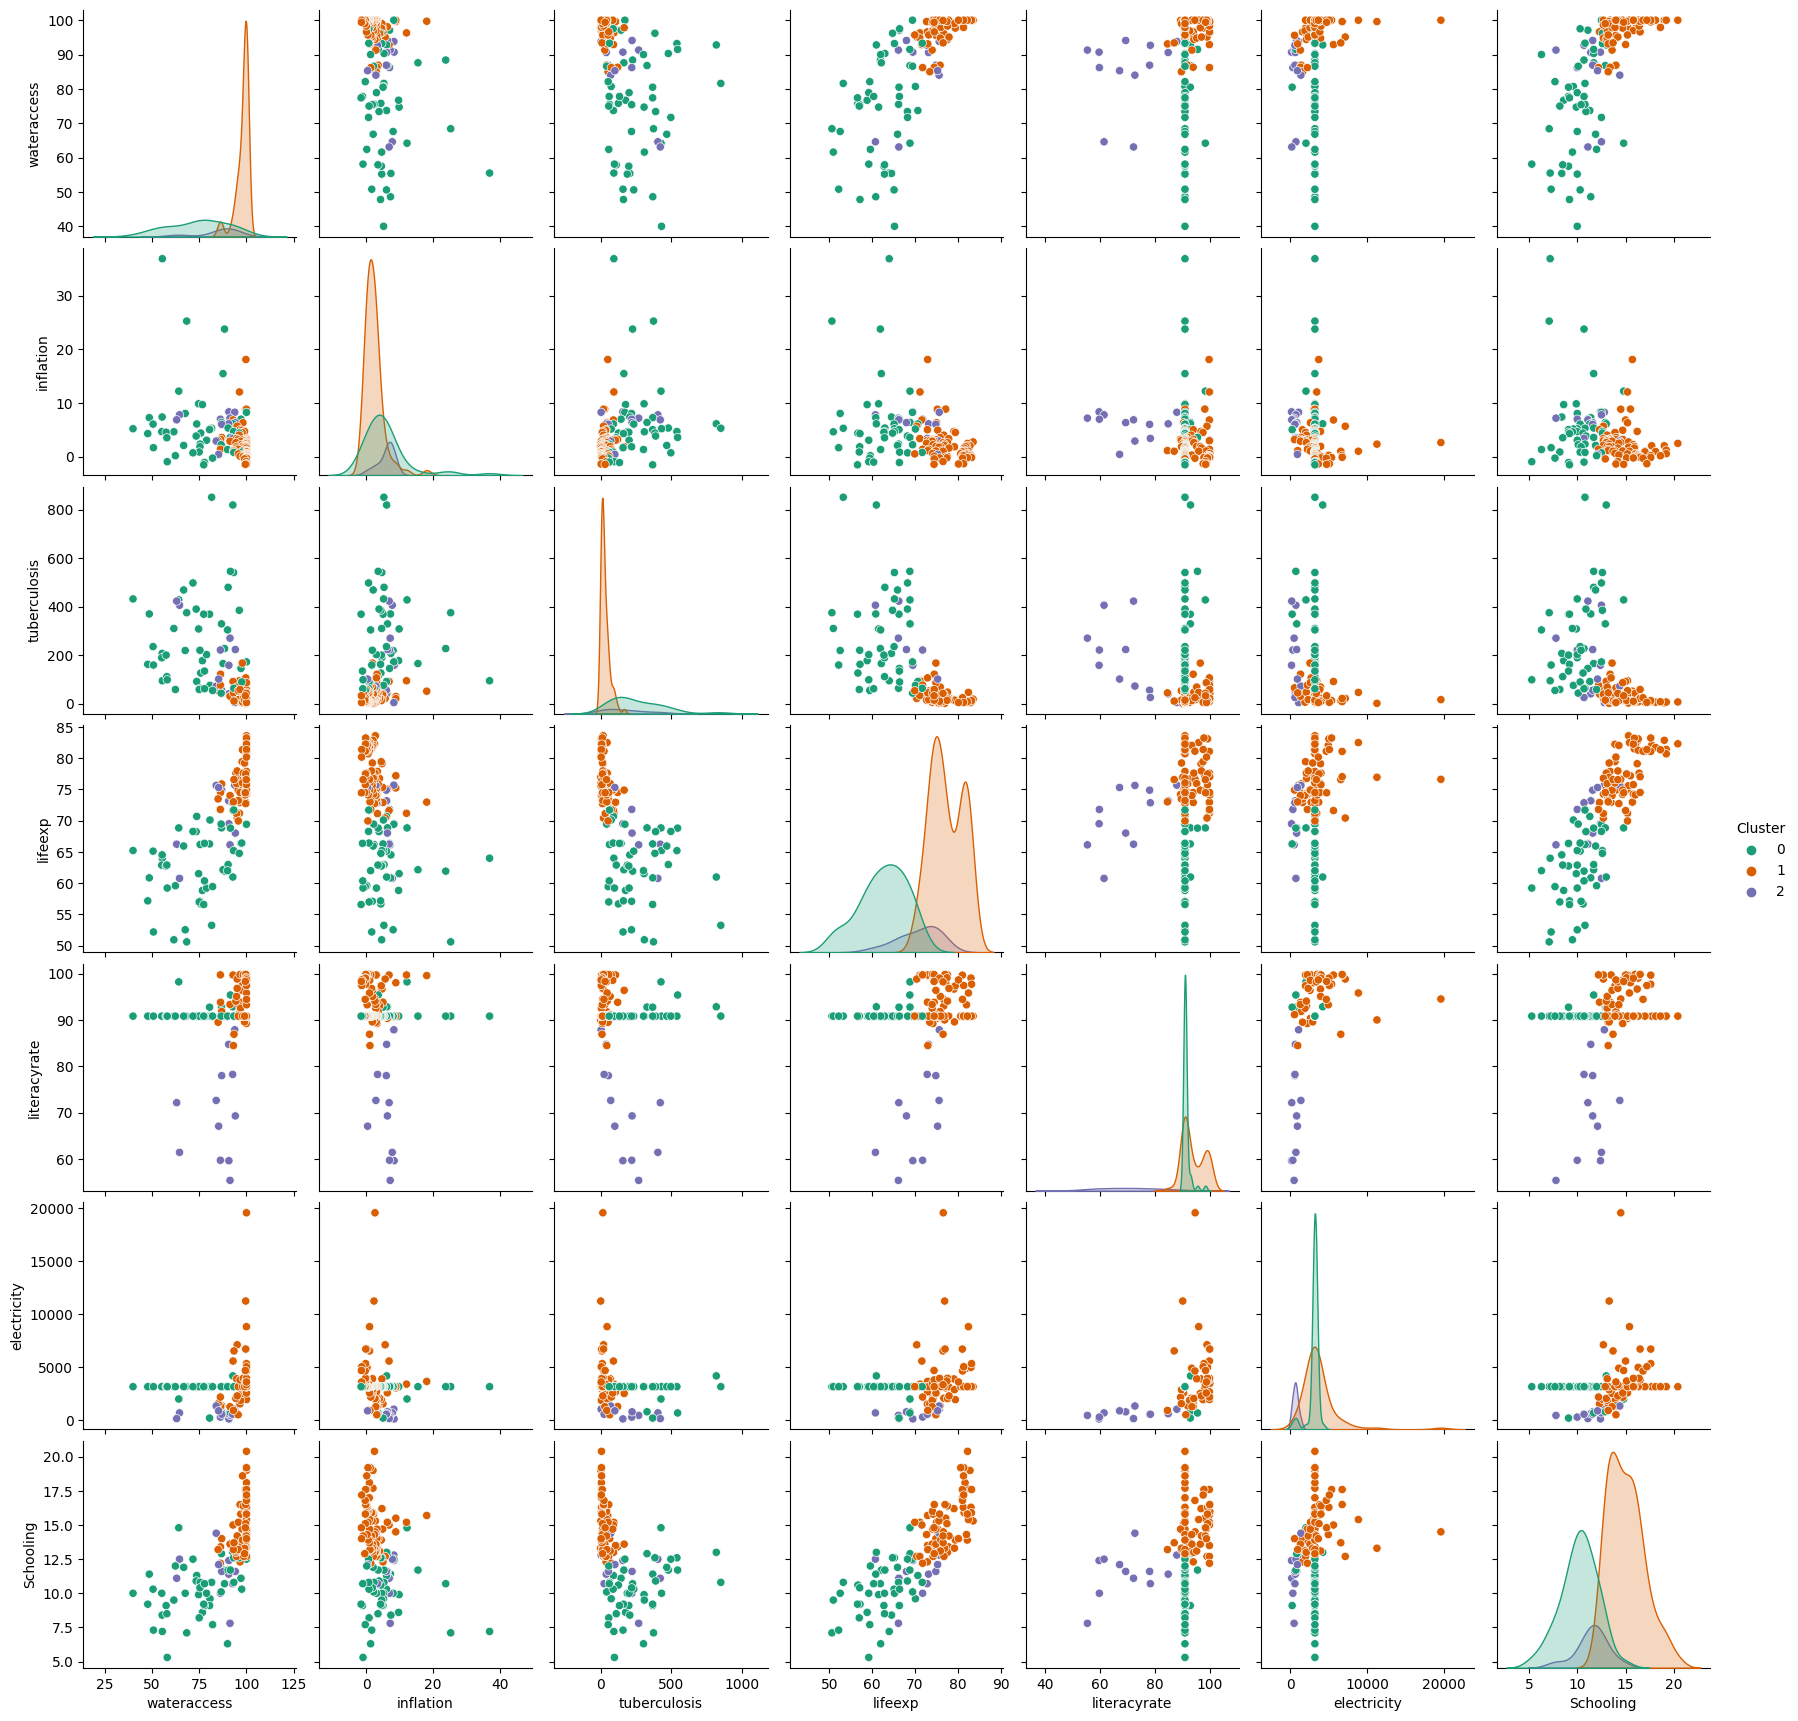

In [20]:
selected_columns = ["wateraccess", "inflation", "tuberculosis", "lifeexp", "literacyrate", "electricity", "Schooling"]
data = df[selected_columns]

# Normalisation des données
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Application de l'algorithme de clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = clustering.fit_predict(normalized_data)

# Visualisation des clusters
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='Dark2')
plt.show()


Représentation visuelle de la distribution des valeurs pour chaque attribut, permettant d'identifier les tendances, de comparer les groupes de pays.

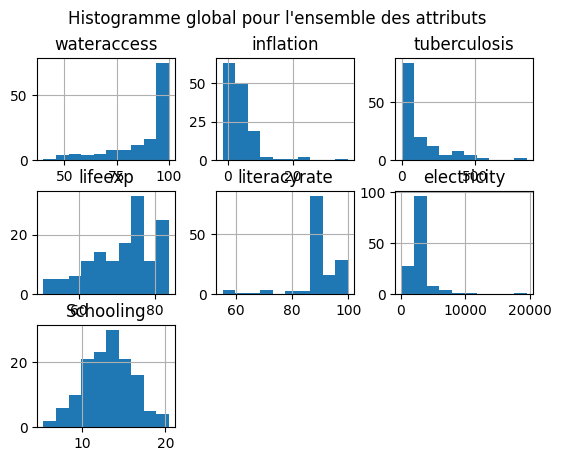

In [21]:
data.hist(bins=10)
plt.suptitle("Histogramme global pour l'ensemble des attributs")
plt.show()

Notre but principal avec ce dataset était de mettre en lumiere avec différent critère la correlation entre ces facteurs et l'esperance de vie voir meme la qualité de vie d'un pays:
**texte en gras**

*` Il est temps maintenant d'établir notre système de notation regroupant les criteres  du dataset notre intention etant d'etablir une liste décroissante des pays qui seront jugé offrir une meilleure qualité ainsi qu'une plus longue espérance de vie `*

In [22]:
# Définir les poids pour chaque critère
weights = {
    "Status_Developed": 0.1,
    "Status_Developing": 0.1,
    "Status_Least Developed": 0.1,
    "wateraccess": 0.15,
    "inflation": 0.1,
    "tuberculosis": 0.15,
    "lifeexp": 0.15,
    "literacyrate": 0.1,
    "electricity": 0.1,
    "Schooling": 0.1
}

# Fonction pour normaliser une colonne
def normalize_column(column):
    return (column - column.min()) / (column.max() - column.min())

# Normaliser les colonnes numériques
numeric_columns = ['wateraccess', 'inflation', 'tuberculosis', 'lifeexp', 'literacyrate', 'electricity', 'Schooling']
# Appliquer la normalisation à chaque colonne numérique
for column in numeric_columns:
    lfe_data[column] = normalize_column(lfe_data[column])

# Calculer la note pour chaque pays en multipliant chaque critère par son poids
lfe_data['OverallScore'] = sum(lfe_data[column] * weights[column] for column in weights.keys() if column in lfe_data.columns)

print(lfe_data[['Country', 'OverallScore']].to_string(index=False))


                 Country  OverallScore
                 Albania      0.436215
                 Algeria      0.353237
                 Armenia      0.437191
              Azerbaijan      0.388691
                 Bahrain      0.530743
              Bangladesh      0.314585
                 Belarus      0.497340
  Bosnia and Herzegovina      0.448499
                  Brazil      0.441058
                Bulgaria      0.445675
                   Chile      0.480462
                   China      0.433356
                Colombia      0.397578
              Costa Rica      0.453763
                 Croatia      0.458274
                  Cyprus      0.458217
      Dominican Republic      0.373914
                 Ecuador      0.398472
             El Salvador      0.370995
                 Estonia      0.484390
                 Georgia      0.448166
                  Greece      0.489900
               Guatemala      0.339508
                Honduras      0.364860
                 Hungary 

#**Concusion**:

Cette étude a exploré l'impact de plusieurs facteurs clés tels que le statut du pays, l'accès à l'eau potable, taux d'inflation sur l'espérance de vie. Les résultats montrent que ces variables sont étroitement liées à la qualité de vie et à la santé des populations. Des pays avec un meilleur accès à l'eau potable, à l'éducation et à l'électricité, ainsi qu'un faible taux d'inflation et de prévalence de la tuberculose, ont tendance à avoir une espérance de vie plus élevée. Ces découvertes mettent en lumière l'importance d'une approche intégrée pour améliorer la santé et le bien-être, suggérant que les efforts pour améliorer ces indicateurs pourraient avoir un impact significatif sur l'espérance de vie à travers le monde.